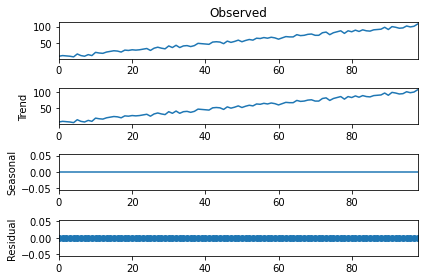

In [2]:
# Additive Decomposition
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

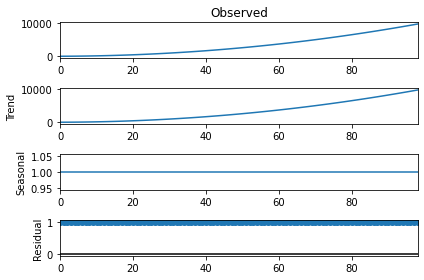

In [3]:
# Multiplicative Decomposition
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', period=1)
result.plot()
pyplot.show()

Taking a sample data-set to further understand the decomposition types

#### Python Time-Series Decomposition

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose as sm

In [3]:
# stting the range of time series
T_Series = np.arange(1, 51)

In [4]:
Trend = T_Series * 2.75

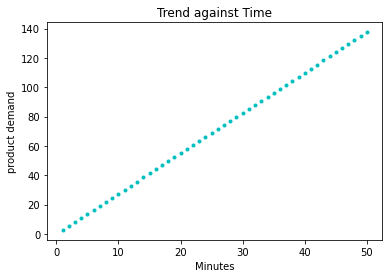

In [5]:
plt.plot(T_Series, Trend, 'c.')
plt.title("Trend against Time")
plt.xlabel("Minutes")
plt.ylabel("product demand");

In [6]:
# creating the seasonality component
seasonality = 10 + np.sin(T_Series) * 10

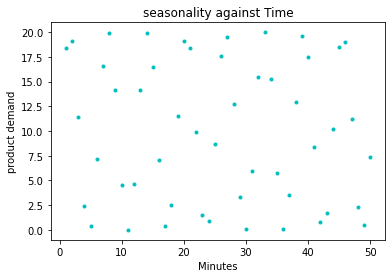

In [7]:
plt.plot(T_Series, seasonality, 'c.')
plt.title("seasonality against Time")
plt.xlabel("Minutes")
plt.ylabel("product demand");

In [8]:
np.random.seed(10)  # for result reproducibility
residual = np.random.normal(loc=0.0, scale=1, size=len(T_Series))

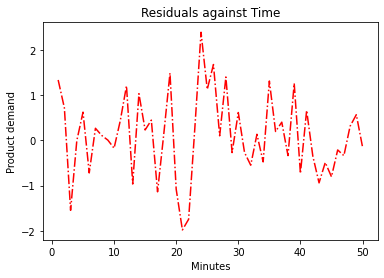

In [9]:
plt.plot(T_Series, residual, 'r-.')
plt.title("Residuals against Time")
plt.xlabel("Minutes")
plt.ylabel("Product demand");

In [10]:
# additive tine series model
additive_Tmodel = Trend + seasonality + residual

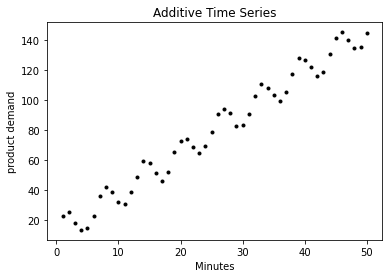

In [11]:
plt.plot(T_Series, additive_Tmodel, 'k.')
plt.title("Additive Time Series")
plt.xlabel("Minutes")
plt.ylabel("product demand");

In [12]:
# we ignore residual to make the pattern more apparent
ignored_residual = np.ones_like(residual)
# we multiply other components to create a multiplicative time series
multiplicative_Tmodel = Trend * seasonality * ignored_residual

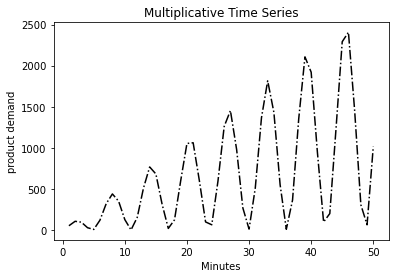

In [13]:
plt.plot(T_Series, multiplicative_Tmodel, 'k-.')
plt.title("Multiplicative Time Series")
plt.xlabel("Minutes")
plt.ylabel("product demand");

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
# frequency is the time a time serie is taking to complete on cycal
ts_dicomposition = seasonal_decompose(x=additive_Tmodel, model='additive', freq=6)
trend_estimate = ts_dicomposition.trend
seasonal_estimate = ts_dicomposition.seasonal
residual_estimate = ts_dicomposition.resid

/var/folders/qp/3g7g7k0j6jn77c8vbzf11bch0000gn/T/ipykernel_41383/1306180625.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead.
  ts_dicomposition = seasonal_decompose(x=additive_Tmodel, model='additive', freq=6)


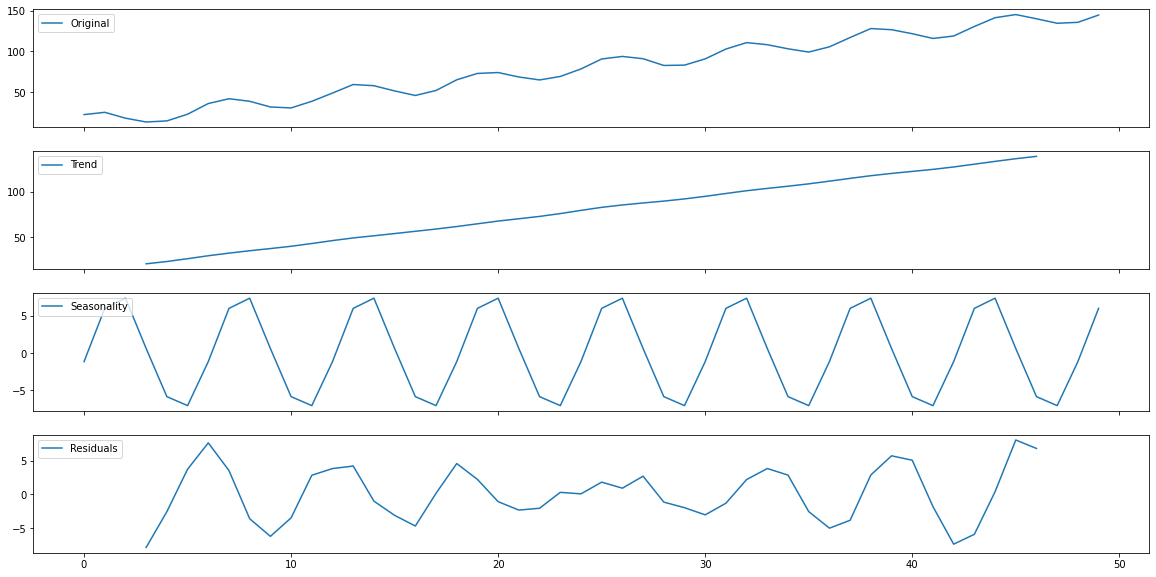

In [16]:
# Plotting the time series and it's components together
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(20)
# First plot to the Original time series
axes[0].plot(additive_Tmodel, label='Original') 
axes[0].legend(loc='upper left');
# second plot to be for trend
axes[1].plot(trend_estimate, label='Trend')
axes[1].legend(loc='upper left');
# third plot to be Seasonality component
axes[2].plot(seasonal_estimate, label='Seasonality')
axes[2].legend(loc='upper left');
# last last plot to be Residual component
axes[3].plot(residual_estimate, label='Residuals')
axes[3].legend(loc='upper left');

In [17]:
ts_decomposition = seasonal_decompose(x=multiplicative_Tmodel, model='multiplicative', freq=6)
trend_estimate = ts_decomposition.trend
seasonal_estimate = ts_decomposition.seasonal
residual_estimate = ts_decomposition.resid

/var/folders/qp/3g7g7k0j6jn77c8vbzf11bch0000gn/T/ipykernel_41383/4137480977.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead.
  ts_decomposition = seasonal_decompose(x=multiplicative_Tmodel, model='multiplicative', freq=6)


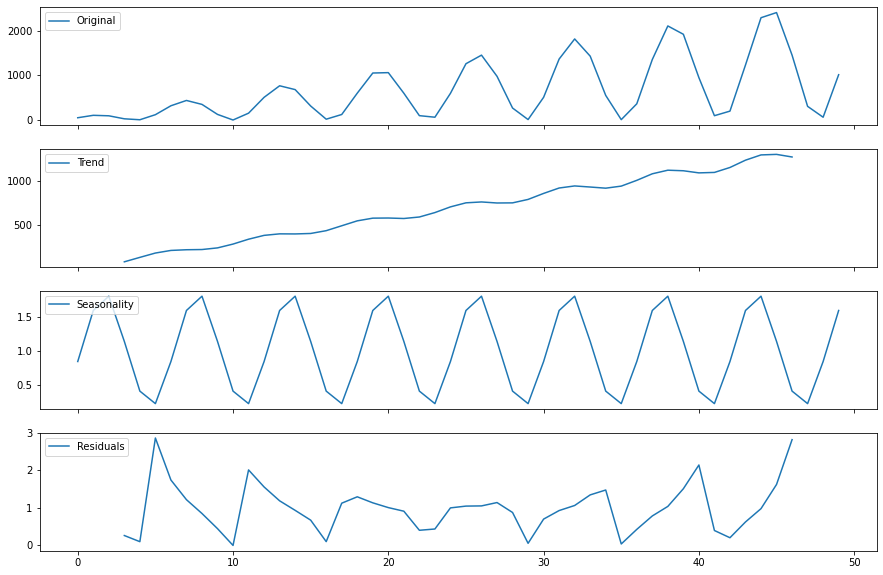

In [18]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(multiplicative_Tmodel, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(trend_estimate, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(seasonal_estimate, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(residual_estimate, label='Residuals')
axes[3].legend(loc='upper left');

In [19]:
!pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=e6b0218a125a0d014e3aff8cd8a4dc167241ecd6a045712545beb4051c01fe61
  Stored in directory: /Users/alinauman/Library/Caches/pip/wheels/f2/b5/2c/59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking
You should consider upgrading via the '/Users/alinauman/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [20]:
# import the library
import yfinance as yf 

In [21]:
data =  yf.download(tickers="FB", start="2016-1-1",end="2020-12-31",progress=False)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,106.000000,106.169998,104.620003,104.660004,104.660004,18391100
2016-01-04,101.949997,102.239998,99.750000,102.220001,102.220001,37912400
2016-01-05,102.889999,103.709999,101.669998,102.730003,102.730003,23258200
2016-01-06,101.129997,103.769997,100.900002,102.970001,102.970001,25096200
2016-01-07,100.500000,101.430000,97.300003,97.919998,97.919998,45172900


<AxesSubplot:xlabel='Date'>

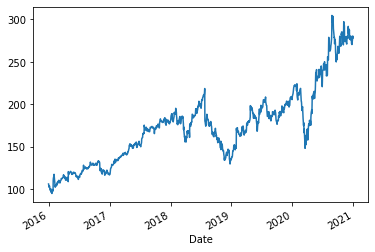

In [22]:
data['High'].plot()

In [23]:
ts_decompose_add = seasonal_decompose(x=data['High'], 
                                          model='additive', 
                                          freq=36) 
# the frequency of fluctuation is more than one year thus cyclic component
estimated_trend_add = ts_decompose_add.trend
estimated_seasonal_add = ts_decompose_add.seasonal
estimated_residual_add = ts_decompose_add.resid

/var/folders/qp/3g7g7k0j6jn77c8vbzf11bch0000gn/T/ipykernel_41383/3956445020.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead.
  ts_decompose_add = seasonal_decompose(x=data['High'],


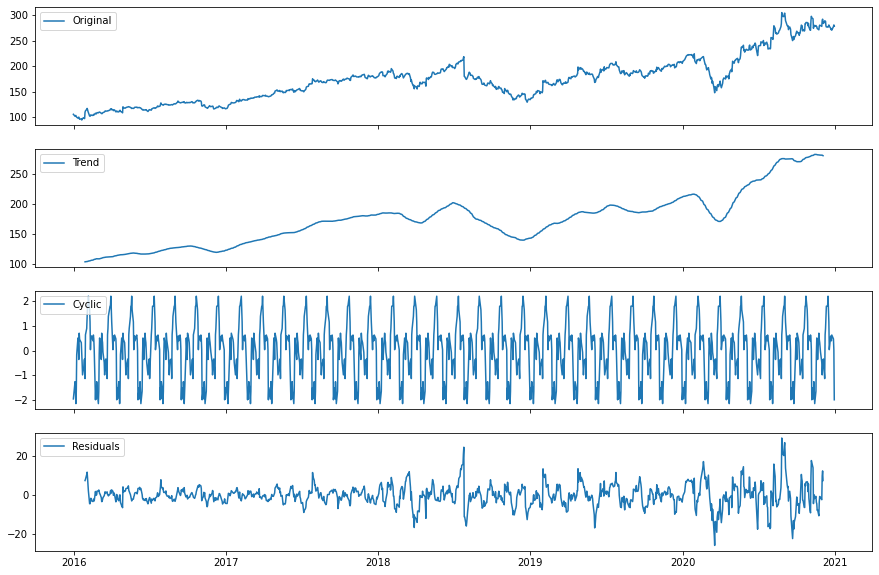

In [24]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(data['High'], label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend_add, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal_add, label='Cyclic')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual_add, label='Residuals')
axes[3].legend(loc='upper left');